<a href="https://colab.research.google.com/github/nickLin1225/AI_tibame/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlretrieve

url = "https://github.com/nickLin1225/Titanic/raw/main/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/nickLin1225/Titanic/raw/main/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7ffb14ae91e0>)

In [2]:
import pandas as pd

datas = pd.read_csv("train.csv", encoding="utf-8")
datas_predict = pd.read_csv("test.csv", encoding="utf-8")

1.填補空值

a. 類別值: Pclass, Name(mid), Sex, Cabin(F), Embarked

b. 數值值: Age, SibSp, Parch, Ticket, Fare

補最可能的

a. 類別值: 最常出現的

b. 數值值: 中位數值

In [3]:
# ignore_index
datas_total = pd.concat([datas, datas_predict], axis=0)
datas_total = datas_total.drop(["PassengerId", "Survived"], axis=1)
datas_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
# demo pandas filter
# 帶入跟妳資料筆數一樣多的True False
d = pd.DataFrame([
    [1, 2],
    [3, 4],
    [5, 6]
])
d[[True, False, False]]

,0,1
0,1,2


In [5]:
s = datas_total.isna().sum()
fil = s > 0
s[fil].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [6]:
v = datas_total["Embarked"].value_counts().idxmax()
datas_total["Embarked"] = datas_total["Embarked"].fillna(v)
# !!
s = datas_total.isna().sum()
fil = s > 0
s[fil].sort_values(ascending=False)

Cabin    1014
Age       263
Fare        1
dtype: int64

In [7]:
# median自動找出中位數
med = datas_total.median().drop("Pclass")
datas_total = datas_total.fillna(med)
# !!
s = datas_total.isna().sum()
fil = s > 0
s[fil].sort_values(ascending=False)

<ipython-input-7-a408ebe2aff6>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  med = datas_total.median().drop("Pclass")


Cabin    1014
dtype: int64

In [8]:
# demo:
s = "Kelly, Mr. James"
s.split(",")[-1].split(".")[0].strip()
import re
pat = r".+,(.+)\..+"
re.match(pat, s).group(1).strip()

'Mr'

In [9]:
def name(s):
    return s.split(",")[-1].split(".")[0].strip()
datas_total["Name"] = datas_total["Name"].apply(name)
datas_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,28.0,0,0,A.5. 3236,8.0500,NaN,S
414,1,Dona,female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,Mr,male,28.0,0,0,359309,8.0500,NaN,S


In [10]:
count = datas_total["Ticket"].value_counts()
def ticket(t):
  if pd.isna(t):
    return t
  else:
    return count[t]
datas_total["Ticket"] = datas_total["Ticket"].apply(ticket)
datas_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C85,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C123,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,28.0,0,0,1,8.0500,NaN,S
414,1,Dona,female,39.0,0,0,3,108.9000,C105,C
415,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
416,3,Mr,male,28.0,0,0,1,8.0500,NaN,S


In [11]:
def cabin(c):
  if pd.isna(c):
    return c
  else:
    return c[0]
datas_total["Cabin"] = datas_total["Cabin"].apply(cabin)
datas_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,28.0,0,0,1,8.0500,NaN,S
414,1,Dona,female,39.0,0,0,3,108.9000,C,C
415,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
416,3,Mr,male,28.0,0,0,1,8.0500,NaN,S


In [12]:
c = datas_total["Name"].value_counts()
reserved = c[c > 50].index
def name2(n):
  if n in reserved:
    return n
  else:
    return None
datas_total["Name"] = datas_total["Name"].apply(name2)
datas_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,28.0,0,0,1,8.0500,NaN,S
414,1,None,female,39.0,0,0,3,108.9000,C,C
415,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
416,3,Mr,male,28.0,0,0,1,8.0500,NaN,S


In [13]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
datas_total = pd.get_dummies(pd.get_dummies(datas_total), columns=["Pclass"])
datas_total

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
414,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
415,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
416,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [14]:
# !!
# 檢查是否有空值
s = datas_total.isna().sum()
fil = s > 0
s[fil].sort_values(ascending=False)

Series([], dtype: int64)

**資料預處理**

1.補中位數

2.One Hot Encoding

3.靠賽: 想辦法產生更多有意義的欄位給妳的演算法

In [15]:
datas_total["family"] = datas_total["SibSp"] + datas_total["Parch"]
datas_total

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
414,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
415,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
416,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [16]:
# Demo: 取列, iloc(看妳具體是第幾列), loc(看妳列標籤的)
t = pd.DataFrame([
    ["A", "B"],
    ["C", "D"]
], columns=["x", "y"], index=[1, 1])
# t.iloc[1]
t.loc[1]

,x,y
1,A,B
1,C,D


In [17]:
import numpy as np
x = datas_total.iloc[:len(datas)]
x_predict = datas_total.iloc[len(datas):]
x_np = np.array(x)
x_predict_np = np.array(x_predict)
# x_predict

In [18]:
# 順便準備一份有scaling的, 因為等等會用到跟距離有關的演算法
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_total_scaled = pd.DataFrame(scaler.fit_transform(datas_total),
                  columns=datas_total.columns)
x_scaled = datas_total_scaled.iloc[:len(datas)]
x_predict_scaled = datas_total_scaled.iloc[len(datas):]
x_scaled_np = np.array(x_scaled)
x_predict_scaled_np = np.array(x_predict_scaled)

In [19]:
y = datas["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<Axes: >

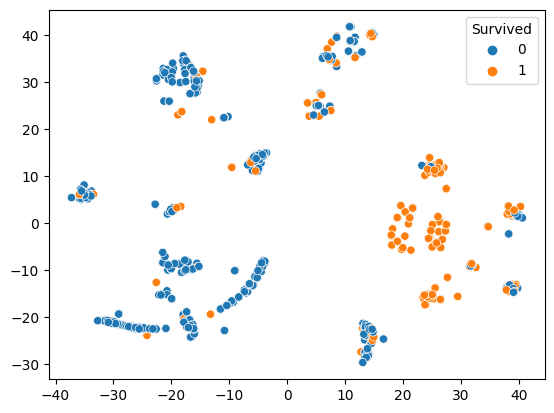

In [20]:
import seaborn as sns
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_jobs=-1)
data_tsne = tsne.fit_transform(x_scaled_np)
xs = data_tsne[:, 0]
ys = data_tsne[:, 1]
sns.scatterplot(x=xs,
        y=ys,
        hue=y)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()
params = {
    "max_depth":range(3, 11)
}
cv = GridSearchCV(clf, params, n_jobs=-1, cv=10)
cv.fit(x_np, y)
print(cv.best_score_)
print(cv.best_params_)

0.8282896379525594
{'max_depth': 4}


In [22]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(x_np, y)
pre = clf.predict(x_predict_np)
result = pd.DataFrame({
    "PassengerId":datas_predict["PassengerId"],
    "Survived":pre
})
result.to_csv("dt.csv", encoding="utf-8", index=False)

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
params = {
    "max_depth":range(3, 11),
    "n_estimators":range(21, 150, 2)
}
cv = GridSearchCV(clf, params, n_jobs=-1, cv=10)
cv.fit(x_np, y)
print(cv.best_score_)
print(cv.best_params_)

0.8417852684144819
{'max_depth': 7, 'n_estimators': 91}


In [24]:
clf = RandomForestClassifier(max_depth=7, n_estimators=27)
clf.fit(x_np, y)
pre = clf.predict(x_predict_np)
result = pd.DataFrame({
    "PassengerId":datas_predict["PassengerId"],
    "Survived":pre
})
result.to_csv("rf.csv", encoding="utf-8", index=False)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(3, 40)
}
cv = GridSearchCV(clf, params, n_jobs=-1, cv=10)
cv.fit(x_scaled_np, y)
print(cv.best_score_)
print(cv.best_params_)

0.832796504369538
{'n_neighbors': 7}


In [26]:
# 這種只比正確率的比賽, 最後只能靠賽微調一下參數
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scaled_np, y)
pre = clf.predict(x_predict_scaled_np)
result = pd.DataFrame({
    "PassengerId":datas_predict["PassengerId"],
    "Survived":pre
})
result.to_csv("knn.csv", encoding="utf-8", index=False)

[Text(0.5, 0.875, 'Fare <= 50.987\ngini = 0.479\nsamples = 569\nvalue = [536, 355]\nclass = Victim'),
 Text(0.25, 0.625, 'Sex_male <= 0.5\ngini = 0.436\nsamples = 479\nvalue = [498, 236]\nclass = Victim'),
 Text(0.125, 0.375, 'SibSp <= 2.5\ngini = 0.459\nsamples = 151\nvalue = [85, 153]\nclass = Survivor'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Fare <= 10.871\ngini = 0.279\nsamples = 328\nvalue = [413, 83]\nclass = Victim'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Sex_male <= 0.5\ngini = 0.367\nsamples = 90\nvalue = [38, 119]\nclass = Survivor'),
 Text(0.625, 0.375, 'Cabin_E <= 0.5\ngini = 0.041\nsamples = 51\nvalue = [2, 93]\nclass = Survivor'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'family <= 4.0\ngini = 0.487\nsamples = 39\nvalue = [36, 26]\nclass = Victim'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9

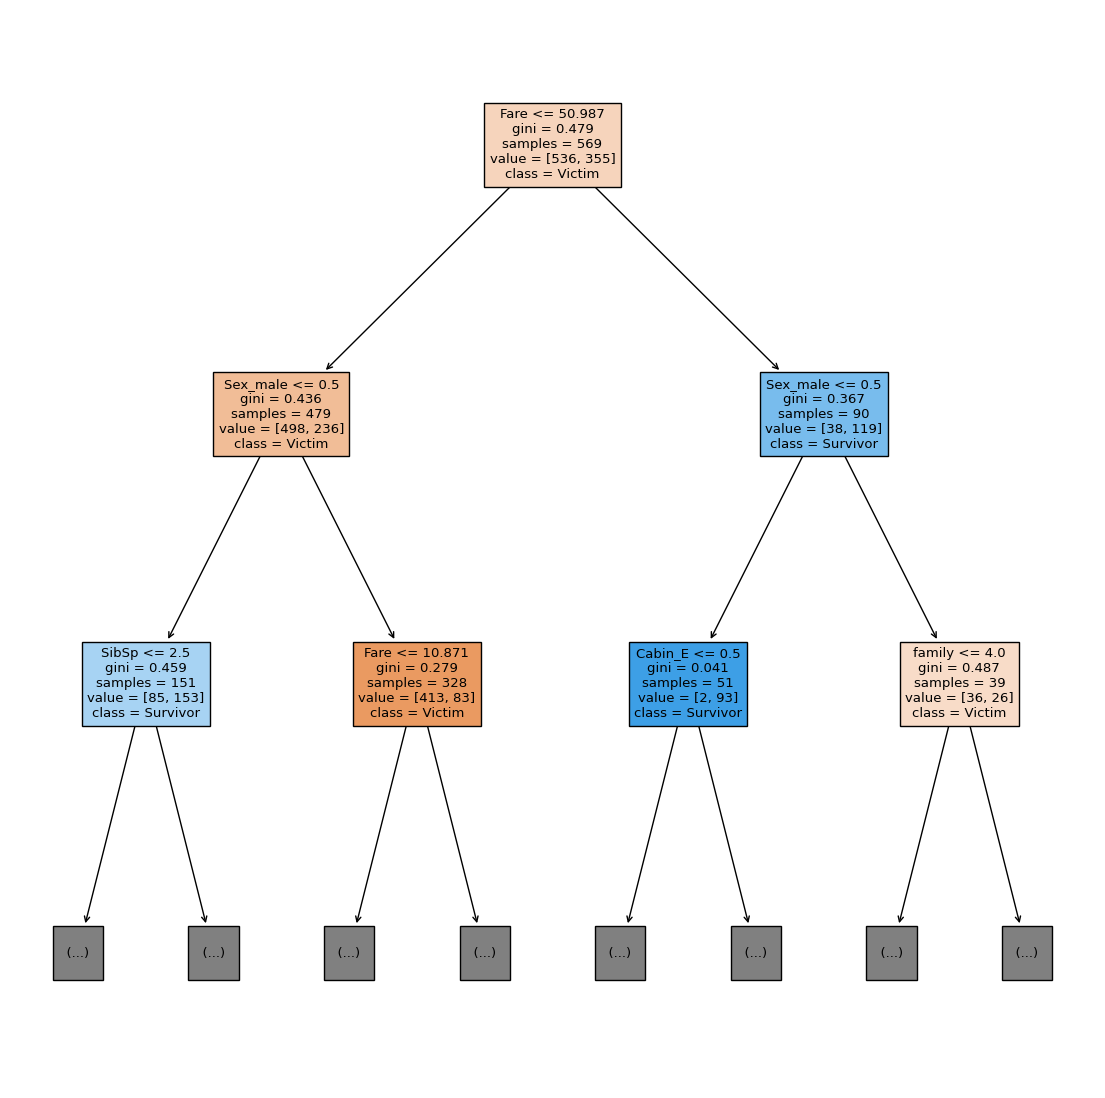

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 我可以把randomforest其中的每顆決策樹畫出來的
clf = RandomForestClassifier(max_depth=7, n_estimators=27)
clf.fit(x_np, y)
# 畫地一顆
# clf.estimators_[0]

plt.figure(figsize=(14, 14))
plot_tree(clf.estimators_[2],
     feature_names=datas_total.columns,
     class_names=["Victim", "Survivor"],
     filled=True,
     max_depth=2)

In [28]:
s = pd.Series(clf.feature_importances_, index=datas_total.columns)
s.sort_values(ascending=False)

Sex_male       0.156519
Sex_female     0.143868
Fare           0.099595
Name_Mr        0.092413
Age            0.079463
family         0.061270
Pclass_1       0.052458
Ticket         0.050300
Pclass_3       0.046581
Name_Miss      0.040443
Name_Mrs       0.039271
SibSp          0.029649
Name_Master    0.018598
Parch          0.014739
Pclass_2       0.012603
Cabin_E        0.012019
Embarked_S     0.010875
Embarked_C     0.009617
Cabin_B        0.008408
Cabin_C        0.007009
Cabin_D        0.005228
Embarked_Q     0.003988
Cabin_A        0.002724
Cabin_G        0.001562
Cabin_F        0.000785
Cabin_T        0.000016
dtype: float64